<a href="https://colab.research.google.com/github/MaxTrivedi/test/blob/main/vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/vaccine_data.csv", na_values='NaN')
dataset.columns = (dataset.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))
dataset.head()


,RESPONDENT_ID,H1N1_CONCERN,H1N1_KNOWLEDGE,BEHAVIORAL_ANTIVIRAL_MEDS,BEHAVIORAL_AVOIDANCE,BEHAVIORAL_FACE_MASK,BEHAVIORAL_WASH_HANDS,BEHAVIORAL_LARGE_GATHERINGS,BEHAVIORAL_OUTSIDE_HOME,BEHAVIORAL_TOUCH_FACE,DOCTOR_RECC_H1N1,DOCTOR_RECC_SEASONAL,CHRONIC_MED_CONDITION,CHILD_UNDER_6_MONTHS,HEALTH_WORKER,HEALTH_INSURANCE,OPINION_H1N1_VACC_EFFECTIVE,OPINION_H1N1_RISK,OPINION_H1N1_SICK_FROM_VACC,OPINION_SEAS_VACC_EFFECTIVE,OPINION_SEAS_RISK,OPINION_SEAS_SICK_FROM_VACC,AGE_GROUP,EDUCATION,RACE,SEX,INCOME_POVERTY,MARITAL_STATUS,RENT_OR_OWN,EMPLOYMENT_STATUS,HHS_GEO_REGION,CENSUS_MSA,HOUSEHOLD_ADULTS,HOUSEHOLD_CHILDREN,EMPLOYMENT_INDUSTRY,EMPLOYMENT_OCCUPATION,H1N1_VACCINE,SEASONAL_VACCINE
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


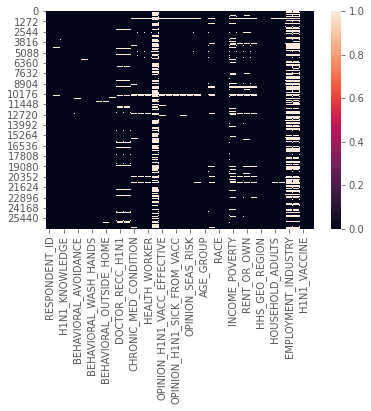

In [ ]:
#dataset = dataset.replace(to_replace ="?", value=np.nan) 
dataset = dataset.replace(to_replace ="\t?", value=np.nan) 
sns.heatmap(data=dataset.isnull())

In [ ]:
np.shape(dataset)

(26707, 38)

In [ ]:
dataset.isnull().sum()/267.07

RESPONDENT_ID                   0.000000
H1N1_CONCERN                    0.344479
H1N1_KNOWLEDGE                  0.434343
BEHAVIORAL_ANTIVIRAL_MEDS       0.265848
BEHAVIORAL_AVOIDANCE            0.778822
BEHAVIORAL_FACE_MASK            0.071142
BEHAVIORAL_WASH_HANDS           0.157262
BEHAVIORAL_LARGE_GATHERINGS     0.325757
BEHAVIORAL_OUTSIDE_HOME         0.307036
BEHAVIORAL_TOUCH_FACE           0.479275
DOCTOR_RECC_H1N1                8.087767
DOCTOR_RECC_SEASONAL            8.087767
CHRONIC_MED_CONDITION           3.635751
CHILD_UNDER_6_MONTHS            3.070356
HEALTH_WORKER                   3.010447
HEALTH_INSURANCE               45.957989
OPINION_H1N1_VACC_EFFECTIVE     1.464036
OPINION_H1N1_RISK               1.452803
OPINION_H1N1_SICK_FROM_VACC     1.479013
OPINION_SEAS_VACC_EFFECTIVE     1.729884
OPINION_SEAS_RISK               1.924589
OPINION_SEAS_SICK_FROM_VACC     2.010709
AGE_GROUP                       0.000000
EDUCATION                       5.268282
RACE            

(0.0, 100.0)

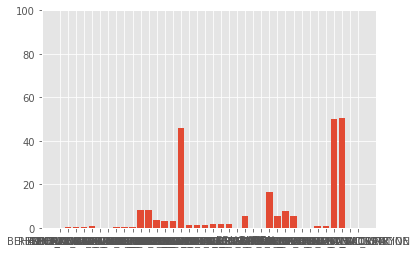

In [ ]:
nulls = dataset.isnull().sum()/267.07
dataset.columns
plt.bar(x=dataset.columns, height=nulls, label='1')
plt.ylim((0, 100))   # set the ylim to bottom, top

In [ ]:
from sklearn.impute import KNNImputer

KNN Imputer does not recognize text data values. It will generate errors if we do not change these values to numerical values. For example, categorical columns ‘rbc’ 'pcc' 'ba' 'htn 'dm' 'cad' 'appet' 'pe' 'ane' and ‘pc’ have text data.

to modify the text data is to perform one-hot encoding or create “dummy variables”. The idea is to convert each category into a binary data column by assigning a 1 or 0. Other options would be to use LabelEncoder or OrdinalEncoder from Scikit-Learn’s preprocessing package.

In [ ]:
dataset.head()

,RESPONDENT_ID,H1N1_CONCERN,H1N1_KNOWLEDGE,BEHAVIORAL_ANTIVIRAL_MEDS,BEHAVIORAL_AVOIDANCE,BEHAVIORAL_FACE_MASK,BEHAVIORAL_WASH_HANDS,BEHAVIORAL_LARGE_GATHERINGS,BEHAVIORAL_OUTSIDE_HOME,BEHAVIORAL_TOUCH_FACE,DOCTOR_RECC_H1N1,DOCTOR_RECC_SEASONAL,CHRONIC_MED_CONDITION,CHILD_UNDER_6_MONTHS,HEALTH_WORKER,HEALTH_INSURANCE,OPINION_H1N1_VACC_EFFECTIVE,OPINION_H1N1_RISK,OPINION_H1N1_SICK_FROM_VACC,OPINION_SEAS_VACC_EFFECTIVE,OPINION_SEAS_RISK,OPINION_SEAS_SICK_FROM_VACC,AGE_GROUP,EDUCATION,RACE,SEX,INCOME_POVERTY,MARITAL_STATUS,RENT_OR_OWN,EMPLOYMENT_STATUS,HHS_GEO_REGION,CENSUS_MSA,HOUSEHOLD_ADULTS,HOUSEHOLD_CHILDREN,EMPLOYMENT_INDUSTRY,EMPLOYMENT_OCCUPATION,H1N1_VACCINE,SEASONAL_VACCINE
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

str_cols = dataset.select_dtypes(include = 'object').columns

LE = LabelEncoder()
for col in str_cols:
    dataset[col] = LE.fit_transform(dataset[col].astype(str)) # Converts to int64

dataset.head()

,RESPONDENT_ID,H1N1_CONCERN,H1N1_KNOWLEDGE,BEHAVIORAL_ANTIVIRAL_MEDS,BEHAVIORAL_AVOIDANCE,BEHAVIORAL_FACE_MASK,BEHAVIORAL_WASH_HANDS,BEHAVIORAL_LARGE_GATHERINGS,BEHAVIORAL_OUTSIDE_HOME,BEHAVIORAL_TOUCH_FACE,DOCTOR_RECC_H1N1,DOCTOR_RECC_SEASONAL,CHRONIC_MED_CONDITION,CHILD_UNDER_6_MONTHS,HEALTH_WORKER,HEALTH_INSURANCE,OPINION_H1N1_VACC_EFFECTIVE,OPINION_H1N1_RISK,OPINION_H1N1_SICK_FROM_VACC,OPINION_SEAS_VACC_EFFECTIVE,OPINION_SEAS_RISK,OPINION_SEAS_SICK_FROM_VACC,AGE_GROUP,EDUCATION,RACE,SEX,INCOME_POVERTY,MARITAL_STATUS,RENT_OR_OWN,EMPLOYMENT_STATUS,HHS_GEO_REGION,CENSUS_MSA,HOUSEHOLD_ADULTS,HOUSEHOLD_CHILDREN,EMPLOYMENT_INDUSTRY,EMPLOYMENT_OCCUPATION,H1N1_VACCINE,SEASONAL_VACCINE
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,0,1,8,2,0.0,0.0,10,11,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,1,1,0,1,0,0.0,0.0,13,20,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,1,0,0,9,0,2.0,0.0,15,22,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,1,1,1,5,1,0.0,0.0,10,11,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,2,3,3,0,0,0,0,0,9,0,1.0,0.0,19,5,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
dataset.head()

,RESPONDENT_ID,H1N1_CONCERN,H1N1_KNOWLEDGE,BEHAVIORAL_ANTIVIRAL_MEDS,BEHAVIORAL_AVOIDANCE,BEHAVIORAL_FACE_MASK,BEHAVIORAL_WASH_HANDS,BEHAVIORAL_LARGE_GATHERINGS,BEHAVIORAL_OUTSIDE_HOME,BEHAVIORAL_TOUCH_FACE,DOCTOR_RECC_H1N1,DOCTOR_RECC_SEASONAL,CHRONIC_MED_CONDITION,CHILD_UNDER_6_MONTHS,HEALTH_WORKER,HEALTH_INSURANCE,OPINION_H1N1_VACC_EFFECTIVE,OPINION_H1N1_RISK,OPINION_H1N1_SICK_FROM_VACC,OPINION_SEAS_VACC_EFFECTIVE,OPINION_SEAS_RISK,OPINION_SEAS_SICK_FROM_VACC,AGE_GROUP,EDUCATION,RACE,SEX,INCOME_POVERTY,MARITAL_STATUS,RENT_OR_OWN,EMPLOYMENT_STATUS,HHS_GEO_REGION,CENSUS_MSA,HOUSEHOLD_ADULTS,HOUSEHOLD_CHILDREN,EMPLOYMENT_INDUSTRY,EMPLOYMENT_OCCUPATION,H1N1_VACCINE,SEASONAL_VACCINE
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.25,0.25,0.00,0.25,0.75,0.25,1.0,0.0,0.666667,0.5,0.0,0.333333,0.888889,1.0,0.000000,0.0,0.476190,0.478261,0.0,0.0
1,0.000037,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.75,0.75,0.75,0.25,0.75,0.25,0.00,1.0,1.0,0.666667,0.5,0.5,0.000000,0.111111,0.0,0.000000,0.0,0.619048,0.869565,0.0,1.0
2,0.000075,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,0.5,0.00,0.00,0.75,0.00,0.25,0.00,0.50,1.0,1.0,0.000000,0.5,0.0,0.000000,1.000000,0.0,0.666667,0.0,0.714286,0.956522,0.0,0.0
3,0.000112,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.5,0.50,1.00,1.00,0.75,0.00,1.00,0.00,1.0,0.0,0.666667,0.5,0.5,0.333333,0.555556,0.5,0.000000,0.0,0.476190,0.478261,0.0,1.0
4,0.000150,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5,0.50,0.25,0.50,0.00,0.75,0.50,0.75,1.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.333333,0.0,0.904762,0.217391,0.0,0.0


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dataset = pd.DataFrame(imputer.fit_transform(dataset),columns = dataset.columns)

In [ ]:
dataset.head()

,RESPONDENT_ID,H1N1_CONCERN,H1N1_KNOWLEDGE,BEHAVIORAL_ANTIVIRAL_MEDS,BEHAVIORAL_AVOIDANCE,BEHAVIORAL_FACE_MASK,BEHAVIORAL_WASH_HANDS,BEHAVIORAL_LARGE_GATHERINGS,BEHAVIORAL_OUTSIDE_HOME,BEHAVIORAL_TOUCH_FACE,DOCTOR_RECC_H1N1,DOCTOR_RECC_SEASONAL,CHRONIC_MED_CONDITION,CHILD_UNDER_6_MONTHS,HEALTH_WORKER,HEALTH_INSURANCE,OPINION_H1N1_VACC_EFFECTIVE,OPINION_H1N1_RISK,OPINION_H1N1_SICK_FROM_VACC,OPINION_SEAS_VACC_EFFECTIVE,OPINION_SEAS_RISK,OPINION_SEAS_SICK_FROM_VACC,AGE_GROUP,EDUCATION,RACE,SEX,INCOME_POVERTY,MARITAL_STATUS,RENT_OR_OWN,EMPLOYMENT_STATUS,HHS_GEO_REGION,CENSUS_MSA,HOUSEHOLD_ADULTS,HOUSEHOLD_CHILDREN,EMPLOYMENT_INDUSTRY,EMPLOYMENT_OCCUPATION,H1N1_VACCINE,SEASONAL_VACCINE
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.25,0.25,0.00,0.25,0.75,0.25,1.0,0.0,0.666667,0.5,0.0,0.333333,0.888889,1.0,0.000000,0.0,0.476190,0.478261,0.0,0.0
1,0.000037,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.75,0.75,0.75,0.25,0.75,0.25,0.00,1.0,1.0,0.666667,0.5,0.5,0.000000,0.111111,0.0,0.000000,0.0,0.619048,0.869565,0.0,1.0
2,0.000075,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0,0.0,0.0,0.8,0.5,0.00,0.00,0.75,0.00,0.25,0.00,0.50,1.0,1.0,0.000000,0.5,0.0,0.000000,1.000000,0.0,0.666667,0.0,0.714286,0.956522,0.0,0.0
3,0.000112,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.5,0.50,1.00,1.00,0.75,0.00,1.00,0.00,1.0,0.0,0.666667,0.5,0.5,0.333333,0.555556,0.5,0.000000,0.0,0.476190,0.478261,0.0,1.0
4,0.000150,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.50,0.25,0.50,0.00,0.75,0.50,0.75,1.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.333333,0.0,0.904762,0.217391,0.0,0.0


In [ ]:
dataset.isnull().sum()

RESPONDENT_ID                  0
H1N1_CONCERN                   0
H1N1_KNOWLEDGE                 0
BEHAVIORAL_ANTIVIRAL_MEDS      0
BEHAVIORAL_AVOIDANCE           0
BEHAVIORAL_FACE_MASK           0
BEHAVIORAL_WASH_HANDS          0
BEHAVIORAL_LARGE_GATHERINGS    0
BEHAVIORAL_OUTSIDE_HOME        0
BEHAVIORAL_TOUCH_FACE          0
DOCTOR_RECC_H1N1               0
DOCTOR_RECC_SEASONAL           0
CHRONIC_MED_CONDITION          0
CHILD_UNDER_6_MONTHS           0
HEALTH_WORKER                  0
HEALTH_INSURANCE               0
OPINION_H1N1_VACC_EFFECTIVE    0
OPINION_H1N1_RISK              0
OPINION_H1N1_SICK_FROM_VACC    0
OPINION_SEAS_VACC_EFFECTIVE    0
OPINION_SEAS_RISK              0
OPINION_SEAS_SICK_FROM_VACC    0
AGE_GROUP                      0
EDUCATION                      0
RACE                           0
SEX                            0
INCOME_POVERTY                 0
MARITAL_STATUS                 0
RENT_OR_OWN                    0
EMPLOYMENT_STATUS              0
HHS_GEO_RE

In [ ]:
from sklearn.model_selection import train_test_split

# seperate data into 2 groups : a train dataset and a test dataset
dataset = dataset.sample(frac=1)

# train dataset:
#train = dataset[0:18696] # cut in two the original dataset
# train dataset:
#test = dataset[18697:]

y = dataset['H1N1_VACCINE']
X = dataset.drop(["H1N1_VACCINE"],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
print(np.shape(X))
print(np.shape(y))

(26707, 37)
(26707,)


In [ ]:
#Y_train = train['H1N1_VACCINE'] # create our label
#X_train = train.drop(['H1N1_VACCINE'],axis=1) # drop the Class (label)
#X_train = np.asarray(X_train)
#y_train = np.asarray(Y_train)

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear') # set SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [ ]:
class_names=np.array(['0','1']) 

# Function to plot the confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()

y_train = y_train.astype('int')
y_test = y_test.astype('int')



#print(utils.multiclass.type_of_target(trainingScores.astype('int')))
#>>> multiclass

#print(utils.multiclass.type_of_target(encoded))

In [ ]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
prediction_SVM_all = classifier.predict(X_test) #And finally, we predict our data test.

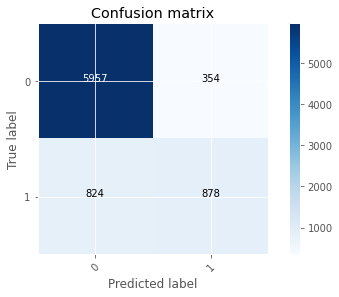

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Accuracy = ' 
      + str( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) ))

Accuracy = 0.8529888930487957


In [ ]:
accuracies_old = [0.8322097378277153, 0.8278401997503121, 0.8273408239700375, 0.8343320848938827, 0.83832709113608, 0.834956304619226, 0.8318352059925094, 0.8307116104868913, 0.8369538077403246, 0.8309612983770287, 0.832334581772784, 0.8337078651685393, 0.8257178526841448, 0.8423220973782771, 0.831210986267166, 0.8295880149812734, 0.8332084893882646, 0.831960049937578, 0.8333333333333334, 0.8328339575530587, 0.8362047440699126, 0.8307116104868913, 0.833458177278402, 0.8360799001248439, 0.833083645443196, 0.8414481897627965, 0.8372034956304619, 0.831585518102372, 0.8328339575530587, 0.8425717852684145, 0.8333333333333334, 0.83645443196005, 0.8313358302122347, 0.8320848938826467, 0.8377028714107366, 0.83645443196005, 0.8365792759051186, 0.8357053682896379, 0.8318352059925094, 0.833083645443196, 0.8307116104868913, 0.8365792759051186, 0.8352059925093633, 0.8328339575530587, 0.833083645443196, 0.8385767790262172, 0.8362047440699126, 0.8289637952559301, 0.8355805243445693, 0.8377028714107366, 0.8413233458177278, 0.8378277153558052, 0.8355805243445693, 0.8259675405742821, 0.8363295880149813, 0.8339575530586767, 0.835330836454432, 0.8325842696629213, 0.8397003745318352, 0.8357053682896379, 0.8365792759051186, 0.8310861423220974, 0.8270911360799001, 0.833083645443196, 0.8305867665418227, 0.8318352059925094, 0.8324594257178527, 0.8335830212234706, 0.8317103620474408, 0.8309612983770287, 0.83458177278402, 0.8350811485642946, 0.8324594257178527, 0.8354556803995006, 0.8325842696629213, 0.8392009987515605, 0.8344569288389513, 0.833458177278402, 0.8322097378277153, 0.8332084893882646, 0.8269662921348314, 0.8298377028714108, 0.833083645443196, 0.8373283395755305, 0.8362047440699126, 0.8359550561797753, 0.8390761548064919, 0.834956304619226, 0.8285892634207241, 0.8362047440699126, 0.830087390761548, 0.8374531835205993, 0.8325842696629213, 0.8358302122347067, 0.8375780274656679, 0.8333333333333334, 0.83270911360799, 0.8352059925093633, 0.83270911360799, 0.8343320848938827]

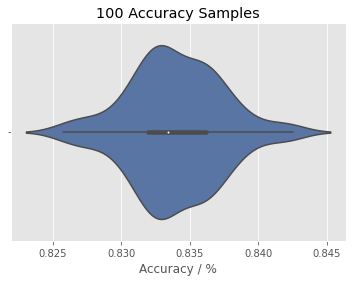

In [ ]:
import seaborn as sns
plt.title('100 Accuracy Samples')
plt.xlabel('Accuracy / %')

sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=accuracies_old)

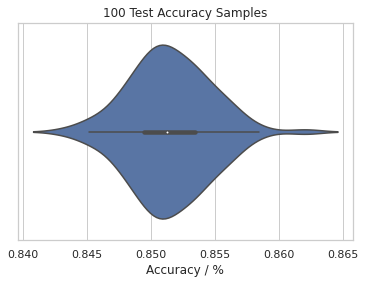

In [ ]:
# predicting h1n1 using seasonal as feature
accuracies = [0.8499375780274657, 0.853183520599251, 0.8551810237203495, 0.8481897627965044, 0.8524344569288389, 0.850936329588015, 0.8518102372034956, 0.8548064918851436, 0.8504369538077403, 0.849438202247191, 0.8536828963795255, 0.8534332084893883, 0.8478152309612984, 0.8496878901373284, 0.853183520599251, 0.8584269662921349, 0.850187265917603, 0.8559300873907616, 0.8520599250936329, 0.8500624219725343, 0.8469413233458177, 0.848314606741573, 0.8544319600499376, 0.8530586766541822, 0.8563046192259676, 0.8563046192259676, 0.849063670411985, 0.8558052434456929, 0.847565543071161, 0.8500624219725343, 0.8571785268414482, 0.8455680399500625, 0.8510611735330836, 0.8468164794007491, 0.849438202247191, 0.8540574282147316, 0.8541822721598002, 0.853183520599251, 0.8484394506866417, 0.8510611735330836, 0.8455680399500625, 0.8538077403245943, 0.853183520599251, 0.847565543071161, 0.851310861423221, 0.8515605493133583, 0.8478152309612984, 0.850187265917603, 0.8560549313358302, 0.8510611735330836, 0.8620474406991261, 0.8521847690387017, 0.8536828963795255, 0.8486891385767791, 0.8493133583021224, 0.854681647940075, 0.8503121098626717, 0.8518102372034956, 0.8496878901373284, 0.8560549313358302, 0.8451935081148564, 0.849063670411985, 0.8488139825218477, 0.8549313358302122, 0.849438202247191, 0.850187265917603, 0.8489388264669163, 0.8473158551810237, 0.8506866416978777, 0.8559300873907616, 0.8511860174781523, 0.8511860174781523, 0.8496878901373284, 0.8519350811485643, 0.8433208489388264, 0.8529338327091136, 0.8476903870162297, 0.8534332084893883, 0.8504369538077403, 0.851310861423221, 0.8504369538077403, 0.8574282147315855, 0.8533083645443196, 0.8451935081148564, 0.8529338327091136, 0.848314606741573, 0.8506866416978777, 0.8529338327091136, 0.851685393258427, 0.8551810237203495, 0.851685393258427, 0.8510611735330836, 0.8521847690387017, 0.8536828963795255, 0.8544319600499376, 0.8500624219725343, 0.8524344569288389, 0.8520599250936329, 0.8504369538077403, 0.8514357053682896]

import seaborn as sns
plt.title('100 Test Accuracy Samples')
plt.xlabel('Accuracy / %')

sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=accuracies)


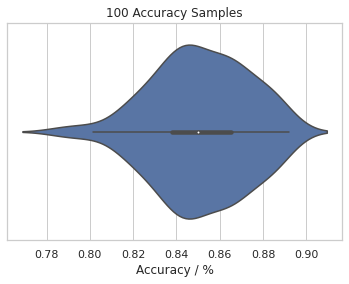

In [ ]:
import matplotlib.pyplot as plt

# Linear Kernel
accuracies = [0.79477612, 0.89179104, 0.83955224, 0.81343284, 0.8619403,  0.86567164, 0.83208955, 0.86142322, 0.85018727, 0.86891386, 0.82771536, 0.86891386, 0.87640449, 0.89138577, 0.84269663, 0.83146067, 0.85018727, 0.82022472, 0.88764045, 0.86891386, 0.85018727, 0.78651685, 0.87265918, 0.85018727, 0.88389513, 0.81273408, 0.85018727, 0.86516854, 0.84269663, 0.83520599, 0.84269663, 0.8576779,  0.86516854, 0.84644195, 0.83895131, 0.83520599, 0.82397004, 0.85018727, 0.87265918, 0.86142322, 0.84644195, 0.87640449, 0.84644195, 0.86142322, 0.83895131, 0.8576779, 0.83146067, 0.84269663, 0.8164794,  0.86891386, 0.83146067,  0.88014981, 0.82771536, 0.88014981, 0.84269663, 0.82022472, 0.85393258, 0.88764045, 0.85018727, 0.83520599, 0.86142322, 0.84644195, 0.80149813, 0.83895131, 0.86516854, 0.86516854, 0.82022472, 0.84644195, 0.88014981, 0.86891386, 0.84269663, 0.88389513, 0.83895131, 0.82022472, 0.85393258, 0.86516854, 0.85393258, 0.88389513, 0.84269663, 0.82771536, 0.86516854, 0.8576779, 0.88014981, 0.88764045, 0.84644195, 0.88389513, 0.83520599, 0.8576779, 0.86516854, 0.84269663, 0.88014981, 0.83895131, 0.85018727, 0.87265918, 0.82771536, 0.84269663, 0.86516854, 0.8576779,  0.83520599, 0.82022472]

import seaborn as sns
plt.title('100 Accuracy Samples')
plt.xlabel('Accuracy / %')

sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=accuracies)

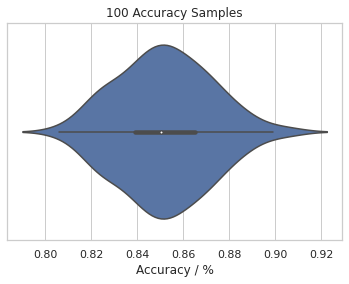

In [ ]:
# RBF Kernel
import matplotlib.pyplot as plt
import seaborn as sns
accuracies = [0.80597015, 0.87313433, 0.84328358, 0.81716418, 0.85447761, 0.8619403,
 0.83208955, 0.87265918, 0.86142322, 0.86142322, 0.82397004, 0.88389513,
 0.87265918, 0.90636704, 0.85018727, 0.85018727, 0.87640449, 0.84269663,
 0.86891386, 0.85393258, 0.84644195, 0.81273408, 0.86891386, 0.83895131,
 0.88389513, 0.82022472, 0.83895131, 0.8576779,  0.84644195, 0.82022472,
 0.84644195, 0.85393258, 0.86142322, 0.85393258, 0.83895131, 0.84269663,
 0.85393258, 0.85018727, 0.86891386, 0.84644195, 0.85393258, 0.87265918,
 0.87265918, 0.86516854, 0.82771536, 0.86142322, 0.83146067, 0.82022472,
 0.82397004, 0.84644195, 0.83146067, 0.88764045, 0.83895131, 0.88389513,
 0.84269663, 0.83520599, 0.85018727, 0.8988764,  0.86516854, 0.82022472,
 0.83895131, 0.84644195, 0.83146067, 0.82397004, 0.86142322, 0.87265918,
 0.83895131, 0.85018727, 0.87640449, 0.89138577, 0.86516854, 0.86142322,
 0.8576779,  0.84269663, 0.82771536, 0.86516854, 0.8576779,  0.86891386,
 0.85018727, 0.82397004, 0.85393258, 0.8576779, 0.88014981, 0.88389513,
 0.83895131, 0.86516854, 0.82771536, 0.83895131, 0.85393258, 0.84644195,
 0.87640449, 0.84269663, 0.85393258, 0.86891386, 0.82771536, 0.85018727,
 0.85018727, 0.8576779,  0.83520599, 0.82397004,]

plt.title('100 Accuracy Samples')
plt.xlabel('Accuracy / %')
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=accuracies)

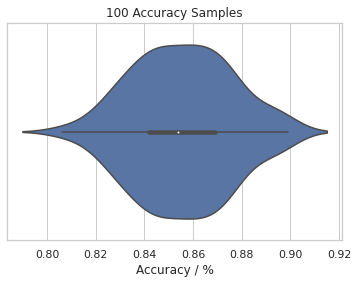

In [ ]:
# Polynomial kernel

import matplotlib.pyplot as plt
import seaborn as sns
accuracies = [0.80597015, 0.8880597,  0.85074627, 0.82835821, 0.87686567, 0.8619403,
 0.8358209,  0.87265918, 0.8576779,  0.87640449, 0.83895131, 0.88014981,
 0.88764045, 0.8988764,  0.86142322, 0.84644195, 0.87265918, 0.82771536,
 0.86891386, 0.86891386, 0.86891386, 0.81273408, 0.88014981, 0.82771536,
 0.89513109, 0.83146067, 0.83520599, 0.86891386, 0.85393258, 0.82771536,
 0.84644195, 0.86516854, 0.86516854, 0.85393258, 0.82022472, 0.84644195,
 0.83895131, 0.84269663, 0.86142322, 0.85393258, 0.84269663, 0.8988764,
 0.86891386, 0.86142322, 0.85393258, 0.84269663, 0.84269663, 0.82397004,
 0.82397004, 0.86142322, 0.83520599, 0.89138577, 0.85018727, 0.87640449,
 0.84644195, 0.84644195, 0.86891386, 0.89138577, 0.86142322, 0.83520599,
 0.85393258, 0.83895131, 0.82022472, 0.83895131, 0.85393258, 0.89513109,
 0.84644195, 0.87640449, 0.87265918, 0.87265918, 0.86142322, 0.87265918,
 0.85018727, 0.83520599, 0.85393258, 0.86142322, 0.86142322, 0.86142322,
 0.84644195, 0.83895131, 0.8576779,  0.87640449, 0.87640449, 0.88764045,
 0.83895131, 0.8576779,  0.84269663, 0.86891386, 0.87640449, 0.84644195,
 0.86891386, 0.84269663, 0.8576779,  0.86891386, 0.83146067, 0.86142322,
 0.85018727, 0.84644195, 0.82771536, 0.83146067,]


plt.title('100 Accuracy Samples')
plt.xlabel('Accuracy / %')
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=accuracies)

In [ ]:
import statistics 

mean = statistics.mean(accuracies)
stdev = statistics.stdev(accuracies)

print('90% confidence interval = ' + str(mean) + ' +- ' + str(1.645*stdev/10))
print(str(round(mean-1.645*stdev/10, 4)) + ' to ' + str(round(mean + 1.645*stdev/10, 4)))

print('95% confidence interval = ' + str(mean) + ' +- ' + str(1.960*stdev/10))
print(str(round(mean-1.960*stdev/10, 4)) + ' to ' + str(round(mean + 1.960*stdev/10, 4)))

print('99% confidence interval = ' + str(mean) + ' +- ' + str(2.576*stdev/10))
print(str(round(mean-2.576*stdev/10, 4)) + ' to ' + str(round(mean + 2.576*stdev/10, 4)))

print('99.9% confidence interval = ' + str(mean) + ' +- ' + str(3.291*stdev/10))
print(str(round(mean-3.291*stdev/10, 4)) + ' to ' + str(round(mean + 3.291*stdev/10, 4)))

90% confidence interval = 0.8555450277 +- 0.003324340403234089
0.8522 to 0.8589
95% confidence interval = 0.8555450277 +- 0.003960916225129978
0.8516 to 0.8595
99% confidence interval = 0.8555450277 +- 0.005205775610170829
0.8503 to 0.8608
99.9% confidence interval = 0.8555450277 +- 0.006650701682093243
0.8489 to 0.8622


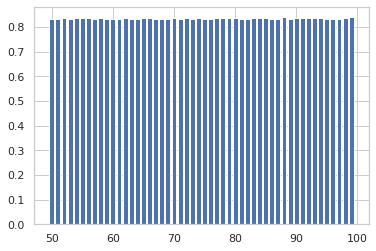

In [ ]:
i = range(50,100)
acc = [0.8345247550966376, 0.8348234754699679, 0.8363250337772631, 0.8323192136672127, 0.8350478893224548, 0.8362810707456979, 0.8362523654225551, 0.8327228327228328, 0.8351232358145085, 0.8331669162922283, 0.834658588918339, 0.833290783763084, 0.8349903163331182, 0.8336381051898293, 0.8345006827893044, 0.8351609164660783, 0.8349724803753497, 0.8336910361203708, 0.8343657544378699, 0.8332319213667213, 0.8357190255000474, 0.8337573808266526, 0.8380665240225637, 0.8344582943292113, 0.8353469795307039, 0.8328695036178718, 0.83427369716865, 0.835820895522388, 0.8355658685792637, 0.835196576624766, 0.8361732146733232, 0.8340399757722592, 0.8348049625572818, 0.8364348122092363, 0.8349559306411659, 0.8364146969342382, 0.8328083209509658, 0.8340379272859041, 0.8401571419802345, 0.8343734398402396, 0.8370882782255505, 0.8356358941252421, 0.8359718846482297, 0.8360524204332709, 0.8372932126080741, 0.8342809596449868, 0.8348286824443659, 0.8327332949308756, 0.8352543866089127, 0.8401108365161387]
plt.bar(i, acc)
plt.show()

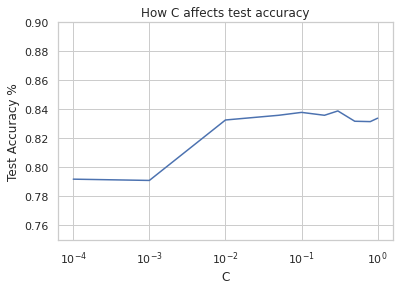

In [ ]:
#   How C changes accuracy:

C = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1]
acc_c = [0.7917602996254681, 0.7908863920099876, 0.8325842696629213, 0.8358302122347067, 0.8378277153558052, 0.8358302122347067, 0.8388264669163545, 0.8317103620474408, 0.8314606741573034, 0.833832709113608]
plt.ylim(top=0.9,bottom=0.75)
#plt.xlim(left=0,right=1)
plt.xscale('log')
plt.plot(C, acc_c)
plt.title('How C affects test accuracy')
plt.xlabel('C')
plt.ylabel('Test Accuracy %')

plt.show()

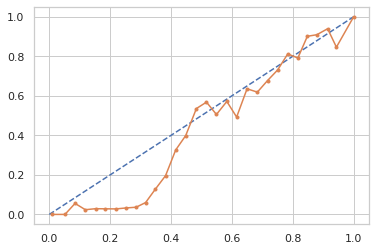

In [ ]:
# SVM reliability diagram
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
# generate 2 class dataset
dataset = pd.read_csv("/content/vaccine_data.csv", na_values='NaN')
dataset.columns = (dataset.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))
str_cols = dataset.select_dtypes(include = 'object').columns
LE = LabelEncoder()
for col in str_cols:
    dataset[col] = LE.fit_transform(dataset[col].astype(str)) # Converts to int64
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
imputer = KNNImputer(n_neighbors=5)
dataset = pd.DataFrame(imputer.fit_transform(dataset),columns = dataset.columns)
dataset = dataset.sample(frac=1)

y = dataset['H1N1_VACCINE']
X = dataset.drop(["H1N1_VACCINE"],axis=1)




# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)
# fit a model
model = SVC()
model.fit(trainX, trainy)
# predict probabilities
probs = model.decision_function(testX)
# reliability diagram
fop, mpv = calibration_curve(testy, probs, n_bins=30, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

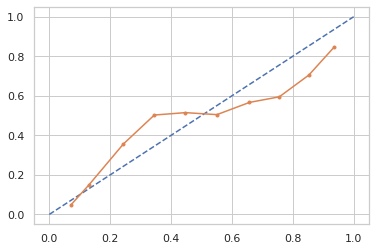

In [ ]:

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
# generate 2 class dataset

dataset = pd.read_csv("/content/vaccine_data.csv", na_values='NaN')
dataset.columns = (dataset.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))
str_cols = dataset.select_dtypes(include = 'object').columns
LE = LabelEncoder()
for col in str_cols:
    dataset[col] = LE.fit_transform(dataset[col].astype(str)) # Converts to int64
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
imputer = KNNImputer(n_neighbors=5)
dataset = pd.DataFrame(imputer.fit_transform(dataset),columns = dataset.columns)
dataset = dataset.sample(frac=1)

y = dataset['H1N1_VACCINE']
X = dataset.drop(["H1N1_VACCINE"],axis=1)


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)
# fit a model
model = SVC()
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(trainX, trainy)
# predict probabilities
probs = calibrated.predict_proba(testX)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

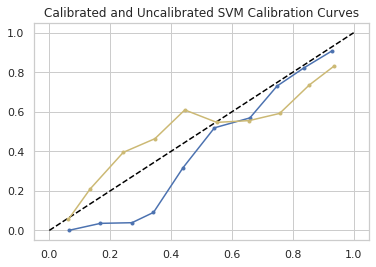

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
 
# predict uncalibrated probabilities
def uncalibrated(trainX, testX, trainy):
	# fit a model
	model = SVC()
	model.fit(trainX, trainy)
	# predict probabilities
	return model.decision_function(testX)
 
# predict calibrated probabilities
def calibrated(trainX, testX, trainy):
	# define model
	model = SVC()
	model.fit(trainX,trainy)
	# define and fit calibration model
	calibrated = CalibratedClassifierCV(model, cv='prefit')
	calibrated.fit(trainX, trainy)
	# predict probabilities
	return calibrated.predict_proba(testX)[:, 1]
 
# generate 2 class dataset


dataset = pd.read_csv("/content/vaccine_data.csv", na_values='NaN')
dataset.columns = (dataset.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))
str_cols = dataset.select_dtypes(include = 'object').columns
LE = LabelEncoder()
for col in str_cols:
    dataset[col] = LE.fit_transform(dataset[col].astype(str)) # Converts to int64
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
imputer = KNNImputer(n_neighbors=5)
dataset = pd.DataFrame(imputer.fit_transform(dataset),columns = dataset.columns)
dataset = dataset.sample(frac=1)

y = dataset['H1N1_VACCINE']
X = dataset.drop(["H1N1_VACCINE"],axis=1)


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)
# uncalibrated predictions
yhat_uncalibrated = uncalibrated(trainX, testX, trainy)
# calibrated predictions
yhat_calibrated = calibrated(trainX, testX, trainy)
# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(testy, yhat_uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(testy, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, 'b', marker='.')
pyplot.plot(mpv_calibrated, fop_calibrated, 'y', marker='.')
plt.title('Calibrated and Uncalibrated SVM Calibration Curves')


pyplot.show()

In [ ]:
import numpy
X = numpy.linspace(0, 1, num=20)
Y = mpv_calibrated
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)


# Calculating Root Mean Squares Error
rmse = 0
n = 10
for i in range(n):
    y_pred = 0 + 1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)


# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = 0 + 1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)


RMSE
0.29488194598384965
R2 Score
-0.05469243740106999


In [ ]:
import numpy
X = numpy.linspace(0, 1, num=20)
Y = mpv_uncalibrated

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)


# Calculating Root Mean Squares Error
rmse = 0
n = 10
for i in range(n):
    y_pred = 0 + 1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = 0 + 1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)


RMSE
0.29203310680842487
R2 Score
-0.10966118868400376


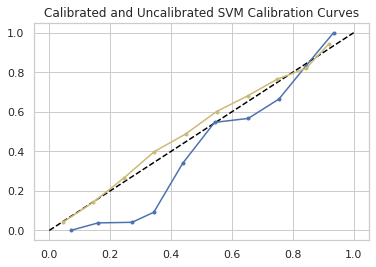

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve

from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot
 
# predict uncalibrated probabilities
def uncalibrated(trainX, testX, trainy):
	# fit a model
	model = SVC()
	model.fit(trainX, trainy)
	# predict probabilities
	return model.decision_function(testX)
 
# predict calibrated probabilities
def calibrated(trainX, testX, trainy):
	# define model
	base_clf = SGDClassifier(max_iter=10000,alpha=0.001,tol=0.0001)
	clf=CalibratedClassifierCV(base_clf)
	clf.fit(trainX,trainy)
	# define and fit calibration model

	# predict probabilities
	return clf.predict_proba(testX)[:, 1]
 


dataset = pd.read_csv("/content/vaccine_data.csv", na_values='NaN')
dataset.columns = (dataset.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))
str_cols = dataset.select_dtypes(include = 'object').columns
LE = LabelEncoder()
for col in str_cols:
    dataset[col] = LE.fit_transform(dataset[col].astype(str)) # Converts to int64
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
imputer = KNNImputer(n_neighbors=5)
dataset = pd.DataFrame(imputer.fit_transform(dataset),columns = dataset.columns)
dataset = dataset.sample(frac=1)

y = dataset['H1N1_VACCINE']
X = dataset.drop(["H1N1_VACCINE"],axis=1)


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)
# uncalibrated predictions
yhat_uncalibrated = uncalibrated(trainX, testX, trainy)
# calibrated predictions
yhat_calibrated = calibrated(trainX, testX, trainy)
# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(testy, yhat_uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(testy, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, 'b', marker='.')
pyplot.plot(mpv_calibrated, fop_calibrated, 'y', marker='.')
plt.title('Calibrated and Uncalibrated SVM Calibration Curves')


pyplot.show()

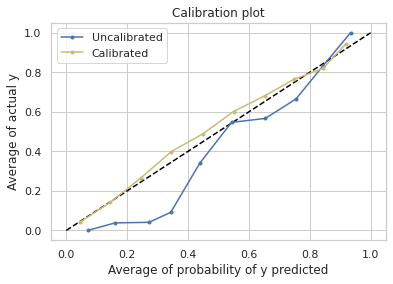

In [ ]:
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, 'b', marker='.', label='Uncalibrated')
pyplot.plot(mpv_calibrated, fop_calibrated, 'y', marker='.',label='Calibrated')
plt.title('Calibration plot')
plt.ylabel('Average of actual y')
plt.xlabel('Average of probability of y predicted')


plt.legend()

pyplot.show()

Accuracy = 0.6977411705977786


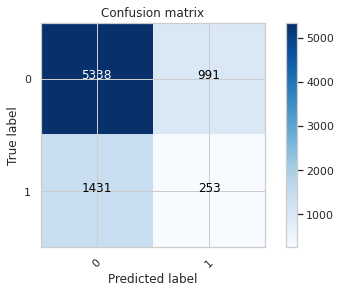

In [ ]:
base_clf = SGDClassifier(max_iter=10000,alpha=0.001,tol=0.0001)
clf=CalibratedClassifierCV(base_clf)
clf.fit(trainX,trainy)

predictions = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm,class_names)

print('Accuracy = ' 
      + str( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) ))

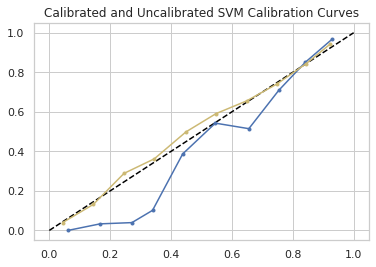

Accuracy = 0.7898415075502309


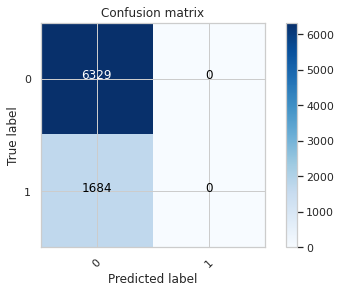

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve

from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot
 
# predict uncalibrated probabilities
def uncalibrated(trainX, testX, trainy):
	# fit a model
	model = SVC()
	model.fit(trainX, trainy)
	# predict probabilities
	return model.decision_function(testX)
 
# predict calibrated probabilities
def calibrated(trainX, testX, trainy):
	# define model
	base_clf = SGDClassifier(max_iter=10000,alpha=0.001,tol=0.0001)
	clf=CalibratedClassifierCV(base_clf)
	clf.fit(trainX,trainy)
	# define and fit calibration model

	# predict probabilities
	return clf.predict_proba(testX)[:, 1]

dataset = pd.read_csv("/content/vaccine_data.csv", na_values='NaN')
dataset.columns = (dataset.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))
str_cols = dataset.select_dtypes(include = 'object').columns
LE = LabelEncoder()
for col in str_cols:
    dataset[col] = LE.fit_transform(dataset[col].astype(str)) # Converts to int64
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
imputer = KNNImputer(n_neighbors=5)
dataset = pd.DataFrame(imputer.fit_transform(dataset),columns = dataset.columns)
dataset = dataset.sample(frac=1)

y = dataset['H1N1_VACCINE']
X = dataset.drop(["H1N1_VACCINE"],axis=1)


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)
# uncalibrated predictions
yhat_uncalibrated = uncalibrated(trainX, testX, trainy)
# calibrated predictions
yhat_calibrated = calibrated(trainX, testX, trainy)
# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(testy, yhat_uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(testy, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, 'b', marker='.')
pyplot.plot(mpv_calibrated, fop_calibrated, 'y', marker='.')
plt.title('Calibrated and Uncalibrated SVM Calibration Curves')
pyplot.show()



classifier = svm.SVC(kernel='linear')
class_names=np.array(['0','1']) 
lab_enc = preprocessing.LabelEncoder()

y_train = y_train.astype('int')
y_test = y_test.astype('int')

classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

prediction_SVM_all = classifier.predict(X_test) #And finally, we predict our data test.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

print('Accuracy = ' 
      + str( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) ))




